# Section 1 -  IMAGE DATA COLLECTION       

## 1.1 Import Dependencies

In [2]:
# Import opencv
import cv2 

# Import uuid
import uuid

# Import Operating System
import os

# Import time
import time

## 1.2 Defining Labels of Image Data

In [8]:
labels = ['thumbsup', 'thumbsdown', 'thankyou', 'peace']

# Number of Images to be Colleted for each class
number_imgs = 40  

## 1.3 Setup Folder for Data Collection 

In [3]:
IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'collectedimages')

In [4]:
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

## 1.4 Capture Image using Webcam

In [9]:
time.sleep(5)
for label in labels:    
    print('Collecting images for {}'.format(label))
    cap = cv2.VideoCapture(0)
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        time.sleep(2)
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imshow(label, frame)
        cv2.imwrite(imgname, frame)        

        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break
    cap.release()
    cv2.destroyAllWindows()

# Section 2 - IMAGE LABELLING

Tool source: LabelImg - https://github.com/tzutalin/labelImg

## 2.1 Setup and Clone folder for LabelImg

In [3]:
LABELIMG_PATH = os.path.join('Tensorflow', 'labelimg')

In [4]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

Cloning into 'Tensorflow/labelimg'...
remote: Enumerating objects: 1826, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 1826 (delta 27), reused 46 (delta 16), pack-reused 1759
Receiving objects: 100% (1826/1826), 232.80 MiB | 3.67 MiB/s, done.
Resolving deltas: 100% (1075/1075), done.


In [ ]:
if os.name == 'posix':
    !cd {LABELIMG_PATH}
    !make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

## 2.2 Run LabelImg Tool 

Select the Object in your images and label them using LabelImg tool.

In [ ]:
!cd {LABELIMG_PATH} && python labelImg.py

# (Important) Train and Test Dataset

######    When we are done labelling all the images, we divide our data into two part train and test, Images from each classes are divided into  70:30 or 80:20 for data training and testing.

In [9]:
TRAIN_IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'train')
if not os.path.exists(TRAIN_IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {TRAIN_IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {TRAIN_IMAGES_PATH}
            
TEST_IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'test')
if not os.path.exists(TEST_IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {TEST_IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {TEST_IMAGES_PATH}


# Section 3 - TRAINING , TESTING and EVALUATION of MODEL

1) https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

2) https://www.tensorflow.org/install/source_windows

3) https://github.com/tensorflow/models

4) https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip

5) https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

## 3.1 Setup Paths

In [10]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [11]:
import os

In [12]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [13]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

## 3.2 Download TF Models Pretrained Models from Tensorflow Model Zoo

In [14]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-06-18 20:23:53--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 216.58.221.48, 2404:6800:4002:806::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|216.58.221.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  3.84MB/s    in 5.4s    

2021-06-18 20:24:01 (3.60 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-

## 3.3 Install Tensorflow Objection Detection and verification

In [15]:
if os.name=='nt':
    !pip install wget
    import wget

In [16]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 57660, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 57660 (delta 36), reused 20 (delta 0), pack-reused 57602
Receiving objects: 100% (57660/57660), 572.93 MiB | 1.61 MiB/s, done.
Resolving deltas: 100% (40024/40024), done.


In [20]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
#     !sudo apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Processing /home/prashant/WorkSpace/Github/TensorFlow_Object_Detection_hand_gesture/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 1.9 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 340 kB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 2.9 MB/s eta 0:00:01    |▌                               | 174 kB 3.9 MB/s eta 0:00:03
     |████████████████████████████████| 9.7 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 27.2 MB 17 kB/s  eta 0:00:01
     |██████████

     |████████████████████████████████| 189 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 211 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.9 MB 887 kB/s eta 0:00:01
     |████████████████████████████████| 46 kB 426 kB/s eta 0:00:01
     |████████████████████████████████| 38.2 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.0 MB 5.5 MB/s eta 0:00:01     |██████████████████▉             | 4.1 MB 2.1 MB/s eta 0:00:02
     |████████████████████████████████| 296 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 662 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 3.4 MB/s eta 0:00:01
  Using cached tensorflow-2.5.0-cp38-cp38-manylinux2010_x86_64.whl (454.4 MB)
     |████████████████████████████████| 43 kB 310 kB/s eta 0:00:01
     |████████████████████████████████| 5

     |████████████████████████████████| 94 kB 419 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 721 kB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 279 kB/s eta 0:00:01
     |████████████████████████████████| 48 kB 373 kB/s eta 0:00:01
     |████████████████████████████████| 129 kB 3.8 MB/s eta 0:00:01
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1655053 sha256=7138bc7a72e2fea0c8473e8019689bdb3f652eda9150f7609930ef7416dc784d
  Stored in directory: /tmp/pip-ephem-wheel-cache-g7paj_yf/wheels/a0/29/02/5ee8ed5ca501b62167c6f28d24b03a26e925b6e494d4191658
  Created wheel for avro-python3: filename=avro_python3-1.9.2.1-py3-none-any.whl size=43512 sha256=0aad9c47a76ae6e9abb779df2aab57d9ea9940a7a5848984bd2bae28900ee29b
  Stored in directory: /home/prashant/.cache/pip/wheels/a5/f2/87/b7

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.4.0 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow-gpu 2.4.0 requires grpcio~=1.32.0, but you have grpcio 1.34.1 which is incompatible.
tensorflow-gpu 2.4.0 requires h5py~=2.10.0, but you have h5py 3.1.0 which is incompatible.
tensorflow-gpu 2.4.0 requires tensorflow-estimator<2.5.0,>=2.4.0rc0, but you have tensorflow-estimator 2.5.0 which is incompatible.


In [23]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-06-18 21:03:15.699569: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.8.5: /home/prashant/WorkSpace/Github/TensorFlow_Object_Detection_hand_gesture/tfod_env/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-18 21:03:17.308134: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-06-18 21:03:17.308857: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-06-18 21:03:17.335429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-18 21:03:17.335713: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 Ti

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model_from_keypoints): 0.3s
I0618 21:03:19.568942 140286404634432 test_util.py:2075] time(__main__.ModelBuilderTF2Test.test_create_center_net_model_from_keypoints): 0.3s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model_from_keypoints
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model_mobilenet
W0618 21:03:19.570744 140286404634432 mobilenet_v2.py:286] `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model_mobilenet): 1.71s
I0618 21:03:21.275642 140286404634432 test_util.py:2075] time(__main__.ModelBuilderTF2Test.test_create_center_net_model_mobilenet): 1.71s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model_mobilenet
[ RUN      ] ModelBuilderTF2Test.test_create_experimental_model
INFO:tensorflow:time(__m

I0618 21:03:23.602329 140286404634432 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b1
I0618 21:03:23.602435 140286404634432 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 88
I0618 21:03:23.602537 140286404634432 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 4
I0618 21:03:23.606293 140286404634432 efficientnet_model.py:147] round_filter input=32 output=32
I0618 21:03:23.620652 140286404634432 efficientnet_model.py:147] round_filter input=32 output=32
I0618 21:03:23.620793 140286404634432 efficientnet_model.py:147] round_filter input=16 output=16
I0618 21:03:23.732402 140286404634432 efficientnet_model.py:147] round_filter input=16 output=16
I0618 21:03:23.732540 140286404634432 efficientnet_model.py:147] round_filter input=24 output=24
I0618 21:03:23.927252 140286404634432 efficientnet_model.py:147] round_filter input=24 output=24
I0618 21:03:23.927460 140

I0618 21:03:27.002367 140286404634432 efficientnet_model.py:147] round_filter input=16 output=24
I0618 21:03:27.002519 140286404634432 efficientnet_model.py:147] round_filter input=24 output=32
I0618 21:03:27.185975 140286404634432 efficientnet_model.py:147] round_filter input=24 output=32
I0618 21:03:27.186115 140286404634432 efficientnet_model.py:147] round_filter input=40 output=48
I0618 21:03:27.350381 140286404634432 efficientnet_model.py:147] round_filter input=40 output=48
I0618 21:03:27.350525 140286404634432 efficientnet_model.py:147] round_filter input=80 output=96
I0618 21:03:27.814479 140286404634432 efficientnet_model.py:147] round_filter input=80 output=96
I0618 21:03:27.814605 140286404634432 efficientnet_model.py:147] round_filter input=112 output=136
I0618 21:03:28.154208 140286404634432 efficientnet_model.py:147] round_filter input=112 output=136
I0618 21:03:28.154348 140286404634432 efficientnet_model.py:147] round_filter input=192 output=232
I0618 21:03:28.538445 14

I0618 21:03:32.745763 140286404634432 efficientnet_model.py:147] round_filter input=112 output=176
I0618 21:03:32.745891 140286404634432 efficientnet_model.py:147] round_filter input=192 output=304
I0618 21:03:33.364164 140286404634432 efficientnet_model.py:147] round_filter input=192 output=304
I0618 21:03:33.364356 140286404634432 efficientnet_model.py:147] round_filter input=320 output=512
I0618 21:03:33.577333 140286404634432 efficientnet_model.py:147] round_filter input=1280 output=2048
I0618 21:03:33.598245 140286404634432 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.6, depth_coefficient=2.2, resolution=456, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_ssd_models_from_config): 18.35s
I0618 21:03:40.522821 140286404634432 test_util.py:2075] time(__main__.ModelBuilderTF2Test.test_create_ssd_models_from_config): 18.35s
[       OK ] ModelBuilderTF2Test.test_create_ssd_models_from_config
[ RUN      ] ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.0s
I0618 21:03:40.530375 140286404634432 test_util.py:2075] time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.0s
[       OK ] ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update
[ RUN      ] ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.0s
I0618 21:03:40.531779 140286404634432 test_util.py:2075] time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.

In [24]:
#Check if import works otherwise 
import object_detection

## 3.4 Create Label Map

In [25]:
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'Thankyou', 'id':3}, {'name':'Peace', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## 3.5 Create TF records

In [26]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/kouya-marino/generateTFRecordScript {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 2.50 KiB | 2.50 MiB/s, done.


In [27]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


## 3.6 Copy Model Config to Training Folder

In [28]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

## 3.7 Update Config For Transfer Learning

In [29]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [30]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [31]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [32]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [33]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

## 3.8 Train the model

In [34]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [35]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [ ]:
!{command}

## 3.9 Evaluate the Model

In [36]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [ ]:
!{command}

## 3.10 Load Train Model From Checkpoint

In [37]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [38]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-5')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## 3.11 Detect from an Image

In [39]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [41]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'peace.e84b109e-d041-11eb-934a-cb6a1ed4321d.jpg')

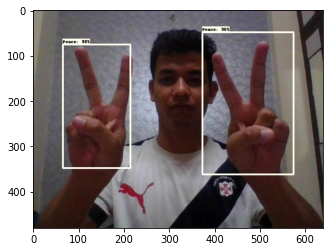

In [42]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

## 3.12 Real Time Detections from your Webcam

In [43]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break